#### Intro to the week

In [2]:
# We have studied the statistics required to understand various aspects of the model that we use to predict the outcome of
# a particular stock value on a certain day.
# Till now we just used a single variable i.e logreturn value to determine the probability of a stock achieving certain gain in value.

In [3]:
# Now the aim of this week is to include multiple varaibles on which the price of the stock may be dependent upon.
# Then we have to develop a model which can successfully predict the desired features within a certain error percent with these variables.
# Finally we have to test whether the model is applicable in real life examples and create more such models on our own. 

In [4]:
# To learn as we go along , I suggest you build your own model as we go along. I too am building a model using dataset 
# on the housing prices in Mumbai City.

#### You can get this one [here](https://www.kaggle.com/sameep98/housing-prices-in-mumbai)

In [2]:
import pandas as pd
hs = pd.read_csv(r'../Week4/archive/Mumbai1.csv', index_col = 0) #since col 0 was the index in the csv 
hs.head(4)

,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0


In [6]:
# Here we have multiple features which may or may not affect the the price of a house in Mumbai
# To find the covariance between them, we use the .cov() method.
hs.cov()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
Price,4.064025e+14,8.101874e+09,1.035286e+07,310085.760376,975683.644506,672755.005979,552228.179238,250256.465579,451084.308926,451683.474039,854552.916349,635387.774081,796024.522514,1.021224e+06,1.022615e+06,414488.308723,1.244648e+06
Area,8.101874e+09,3.095539e+05,3.903534e+02,7.441310,54.562884,24.911618,34.240203,22.916613,30.402668,29.594682,50.388384,40.338412,31.343256,3.488923e+01,2.249595e+01,32.730087,5.813654e+01
No. of Bedrooms,1.035286e+07,3.903534e+02,7.452932e-01,0.040676,0.097064,0.035872,0.047186,0.018543,0.041828,0.048751,0.087675,0.062373,0.052935,6.278120e-02,2.281974e-02,0.053231,1.009620e-01
New/Resale,3.100858e+05,7.441310e+00,4.067624e-02,0.224988,0.057043,0.019948,-0.005834,-0.050164,-0.000634,0.065685,0.063903,0.055071,0.044716,5.698387e-02,-6.035146e-03,0.052420,6.537807e-02
Gymnasium,9.756836e+05,5.456288e+01,9.706371e-02,0.057043,0.243416,0.082814,0.081428,0.003886,0.093719,0.135378,0.186521,0.120880,0.100257,8.392065e-02,2.079030e-02,0.135280,1.775566e-01
Lift Available,6.727550e+05,2.491162e+01,3.587231e-02,0.019948,0.082814,0.159134,0.051420,0.007021,0.051104,0.083949,0.081364,0.084911,0.053642,3.226213e-02,3.518985e-02,0.063444,6.783670e-02
Car Parking,5.522282e+05,3.424020e+01,4.718571e-02,-0.005834,0.081428,0.051420,0.246077,0.114495,0.198173,0.021518,0.070080,0.027391,0.099499,5.771467e-02,-2.168630e-02,0.112687,7.034328e-02
Maintenance Staff,2.502565e+05,2.291661e+01,1.854322e-02,-0.050164,0.003886,0.007021,0.114495,0.202243,0.106616,-0.042538,-0.009358,-0.019988,0.024881,5.001333e-03,-2.146062e-02,-0.002403,-1.758141e-02
24x7 Security,4.510843e+05,3.040267e+01,4.182801e-02,-0.000634,0.093719,0.051104,0.198173,0.106616,0.246077,0.034912,0.082529,0.037476,0.103912,6.559365e-02,-2.152872e-02,0.130021,8.216175e-02
Children's Play Area,4.516835e+05,2.959468e+01,4.875061e-02,0.065685,0.135378,0.083949,0.021518,-0.042538,0.034912,0.246520,0.149723,0.145284,0.103170,8.577195e-02,3.986294e-02,0.127307,1.466971e-01


In [7]:
# As we can see, this data is seemingly meaningless by itself. We have to convert it to values from which we can infer some sort of pattern between the two features.
# So we divide the Covariances of the two features by their standard deviation.
# This will give us values between -1 to 1 ,where -1 will indicate negative correlation and +1 positive correlation. 

In [8]:
# We use .corr() method for correlation
hs.corr()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
Price,1.000000,0.722336,0.594865,0.032428,0.098097,0.083656,0.055221,0.027604,0.045107,0.045126,0.084775,0.063060,0.082225,0.122352,0.118245,0.042325,0.123902
Area,0.722336,1.000000,0.812692,0.028197,0.198772,0.112241,0.124060,0.091590,0.110156,0.107132,0.181121,0.145060,0.117309,0.151458,0.094251,0.121099,0.209696
No. of Bedrooms,0.594865,0.812692,1.000000,0.099334,0.227887,0.104163,0.110182,0.047762,0.097672,0.113734,0.203105,0.144554,0.127684,0.175645,0.061616,0.126929,0.234695
New/Resale,0.032428,0.028197,0.099334,1.000000,0.243751,0.105422,-0.024795,-0.235167,-0.002695,0.278907,0.269434,0.232293,0.196307,0.290162,-0.029659,0.227498,0.276606
Gymnasium,0.098097,0.198772,0.227887,0.243751,1.000000,0.420770,0.332707,0.017514,0.382928,0.552648,0.756068,0.490203,0.423149,0.410831,0.098228,0.564443,0.722224
Lift Available,0.083656,0.112241,0.104163,0.105422,0.420770,1.000000,0.259843,0.039136,0.258250,0.423847,0.407903,0.425870,0.280011,0.195335,0.205629,0.327393,0.341265
Car Parking,0.055221,0.124060,0.110182,-0.024795,0.332707,0.259843,1.000000,0.513232,0.805328,0.087365,0.282532,0.110477,0.417677,0.281009,-0.101906,0.467630,0.284575
Maintenance Staff,0.027604,0.091590,0.047762,-0.235167,0.017514,0.039136,0.513232,1.000000,0.477914,-0.190507,-0.041616,-0.088927,0.115207,0.026861,-0.111239,-0.011001,-0.078456
24x7 Security,0.045107,0.110156,0.097672,-0.002695,0.382928,0.258250,0.805328,0.477914,1.000000,0.141747,0.332720,0.151153,0.436198,0.319371,-0.101166,0.539561,0.332387
Children's Play Area,0.045126,0.107132,0.113734,0.278907,0.552648,0.423847,0.087365,-0.190507,0.141747,1.000000,0.603074,0.585449,0.432697,0.417242,0.187151,0.527821,0.592932


In [9]:
# Now Covariances or Correlation can give us some idea about the relation between features linearly associated with one another
# In real world, there are many features with non linear associations
# We will use scatter matrix to determine these patterns 
# Note that we can only find these plots between two unique features and not one feature and another feature consisting of all the other features combined

In [13]:
# for making it simple to visualize lets create a small dataframe of only some features for scaterring purposes
shs = hs.loc[:,['Price','Area','No. of Bedrooms','New/Resale','Gymnasium']]
shs.head()

,Price,Area,No. of Bedrooms,New/Resale,Gymnasium
0,4850000,720,1,0,0
1,4500000,600,1,0,1
2,6700000,650,1,0,1
3,4500000,650,1,0,0
4,5000000,665,1,0,0


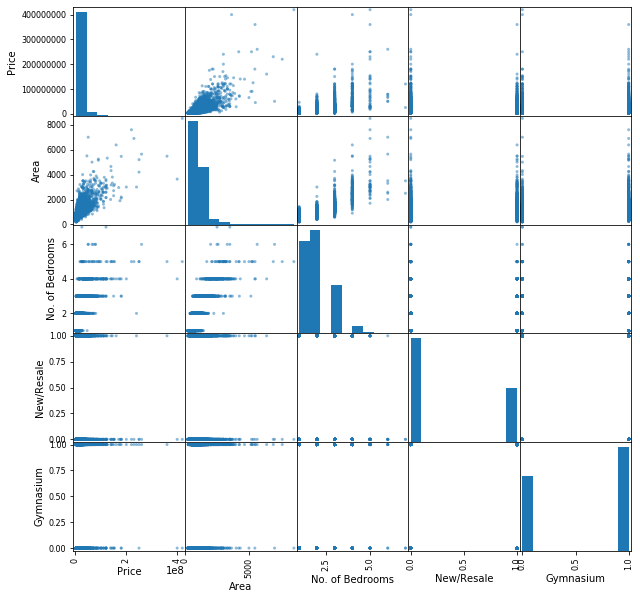

In [14]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(shs,figsize=(10,10))


In [15]:
# Here we see that the price of any plot is somewhat linearly related to its area